In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('uptime_summary.csv')

In [57]:
df

day                                        comment  \
0    240119  Location B; 0x CW rotation of DUTs on tripods   
1    240119  Location B; 0x CW rotation of DUTs on tripods   
2    240119  Location B; 0x CW rotation of DUTs on tripods   
3    240119  Location B; 0x CW rotation of DUTs on tripods   
4    240119  Location B; 0x CW rotation of DUTs on tripods   
..      ...                                            ...   
295  240117  Location A; 2x CW rotation of DUTs on tripods   
296  240117  Location A; 2x CW rotation of DUTs on tripods   
297  240117  Location A; 2x CW rotation of DUTs on tripods   
298  240117  Location A; 2x CW rotation of DUTs on tripods   
299  240117  Location A; 2x CW rotation of DUTs on tripods   

               data_type        dut antenna  limit  h_uptime  v_uptime  \
0               position      P4-03       0   0.03  0.000000  0.000000   
1               position      P4-03       0   0.05  0.822512  0.000000   
2               position      P4-03       0   0.10  0.999149  0.289852   
3               position      P4-03       1   0.03  1.000000  1.000000   
4               position      P4-03       1   0.05  1.000000  1.000000   
..                   ...        ...     ...    ...       ...       ...   
295  titan-vsbl-filtered  P4-03-all       0   0.05  1.000000  0.104655   
296  titan-vsbl-filtered  P4-03-all       0   0.10  1.000000  0.970620   
297  titan-vsbl-filtered  P4-03-all       1   0.03  1.000000  0.999988   
298  titan-vsbl-filtered  P4-03-all       1   0.05  1.000000  1.000000   
299  titan-vsbl-filtered  P4-03-all       1   0.10  1.000000  1.000000   

     hv_uptime  
0     0.000000  
1     0.000000  
2     0.289852  
3     1.000000  
4     1.000000  
..         ...  
295   0.104655  
296   0.970620  
297   0.999988  
298   1.000000  
299   1.000000  

[300 rows x 9 columns]

In [58]:
print(df.limit.unique())

[0.03 0.05 0.1 ]


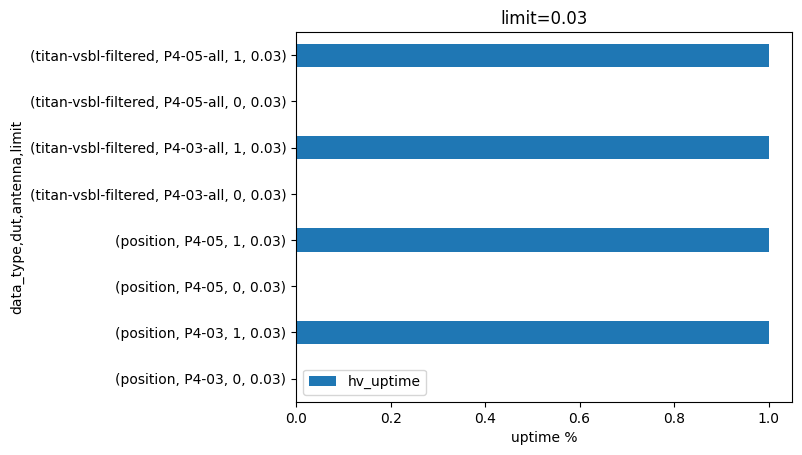

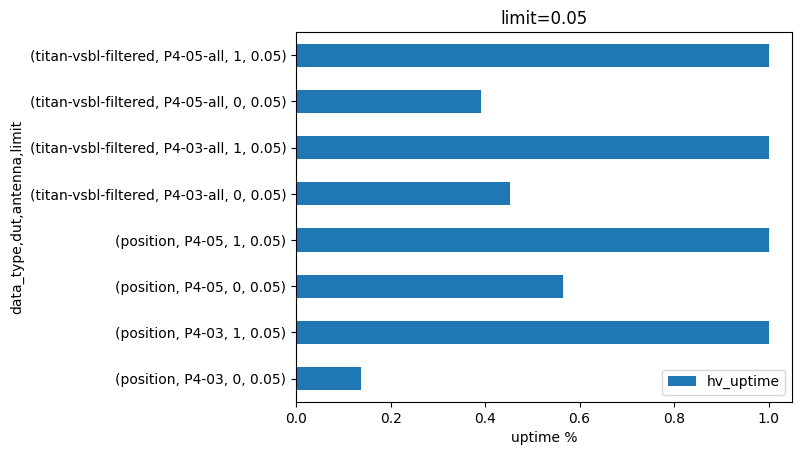

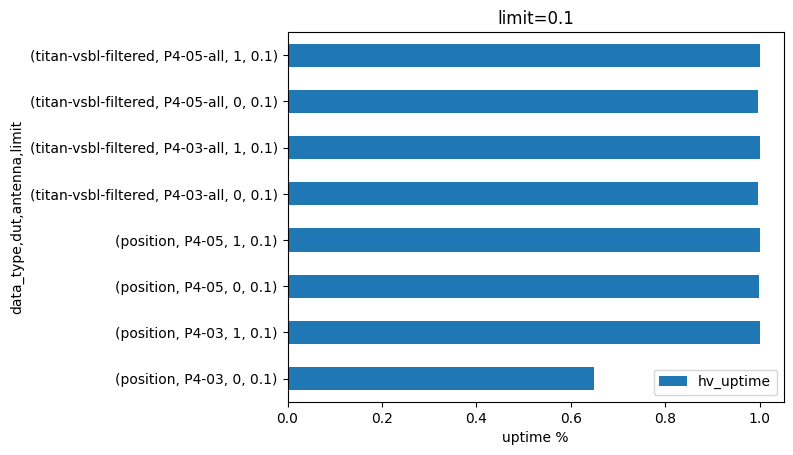

In [68]:
df = pd.read_csv('uptime_summary.csv')
df = df.query("antenna=='0' or antenna=='1'")
#df = df.query("data_type =='titan-vsbl' or data_type=='titan-vsbl-filtered' or data_type='position'")

for limit in df.limit.unique():
    q = f"limit=={limit}"
    #print(q)
    dfl = df[['data_type','dut','antenna','limit','hv_uptime']].query(q)
    #display(dfl.shape)
    dfl.groupby(['data_type','dut','antenna','limit']).median().plot(kind='barh')
    plt.title(f'{limit=}')
    plt.xlabel('uptime %')
    plt.savefig(f'uptime_summary_limit_{limit}.png')